<h1>1. Importing Python Packages and Datasets</h1>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [89]:
trainingDataset = pd.read_csv('train_s3TEQDk.csv')
testDataset = pd.read_csv('test_mSzZ8RL.csv')
trainingDataset.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [90]:
testDataset.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


<h1>2. Missing Values and Data Pre-processing</h1>


In [91]:
trainingDataset.isnull().sum()   #Getting number of null values for each column

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

<h1>3. Adjusting Data</h1>

<p> 1. Filling the 'Credit_Product' field using Interpolation method of 'ForwardFill', so as to reduce the biasing towards 
        most frequent category i.e 'No'<p>
<p> 2. Dropping the column 'Region_Code' and 'ID' because less Relevance on classification<p>

In [92]:
trainingDataset=trainingDataset.fillna(method = 'ffill')
trainingDataset.drop('Region_Code', axis=1, inplace = True)
trainingDataset.drop('ID', axis=1, inplace=True)

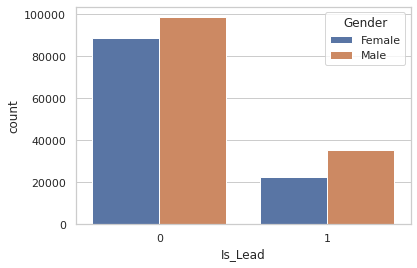

In [74]:
sns.countplot("Is_Lead", hue = 'Gender', data = trainingDataset)
plt.show()

This graph shows that the ratio of male to female of being interested or not interested remains almost same. But still a male customer shows more interest in taking a credit card

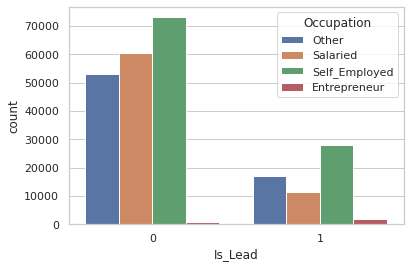

In [7]:
sns.countplot("Is_Lead", hue = 'Occupation', data = trainingDataset)
plt.show()

This graph clearly shows that Entrepreneurs are more likely to take a credit card and Salaried are least expected to

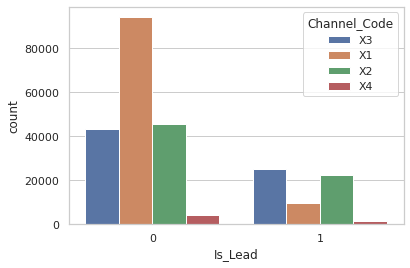

In [8]:
sns.countplot("Is_Lead", hue = 'Channel_Code', data = trainingDataset)
plt.show()

Its evident from this graph that X1 channel_Code are not interested in credit card whereas X3 code shows a lot of interested

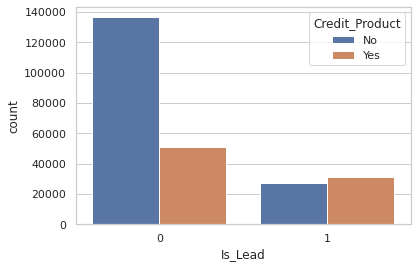

In [9]:
sns.countplot("Is_Lead", hue = 'Credit_Product', data = trainingDataset)
plt.show()

This graph tells that Customers with no Credit Product are not much interested in taking a credit card

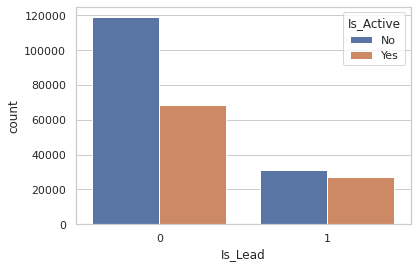

In [10]:
sns.countplot("Is_Lead", hue = 'Is_Active', data = trainingDataset)
plt.show()

The customers with No Is_Lead value are more susceptible to not take a credit card 

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data = trainingDataset.copy()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Credit_Product'] = le.fit_transform(train_data['Credit_Product'])
train_data['Is_Active'] = le.fit_transform(train_data['Is_Active'])
change = {'Other':1,'Self_Employed':2,'Entrepreneur':3,'Salaried':0}
train_data.Occupation = train_data.Occupation.map(change)
change = {'X1':1,'X2':2,'X3':3,'X4':0}
train_data.Channel_Code = train_data.Channel_Code.map(change)
train_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,3,43,0,1045696,0,0
1,0,30,0,1,32,0,581988,0,0
2,0,56,2,3,26,0,1484315,1,0
3,1,34,0,1,19,0,470454,0,0
4,0,30,0,1,33,0,886787,0,0


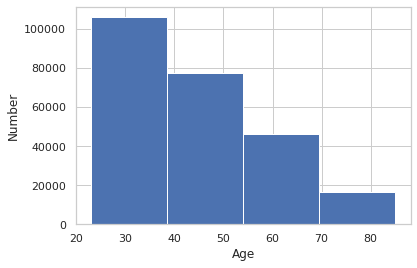

In [12]:
interval = 20

plt.hist(train_data.Age, bins = 4)
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

This shows that a lot of customers are aged in 23 to 30 and 40 to 50


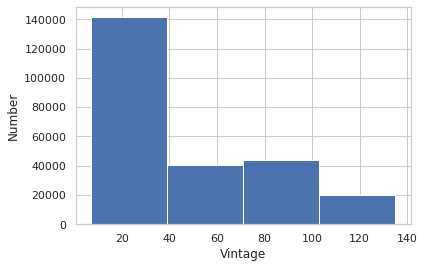

In [13]:
interval = 40
value_for_bin = np.ceil((train_data.Vintage.max() - train_data.Vintage.min()) / interval).astype(int)

plt.hist(train_data.Vintage, bins = value_for_bin)
plt.xlabel("Vintage")
plt.ylabel("Number")
plt.show()

In [94]:
bins = [20, 38, 54, 70, 90]
labels = [0,1,2,3]
train_data['Age'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
train_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,3,1,3,43,0,1045696,0,0
1,0,0,0,1,32,0,581988,0,0
2,0,2,2,3,26,0,1484315,1,0
3,1,0,0,1,19,0,470454,0,0
4,0,0,0,1,33,0,886787,0,0


In [95]:
bins = [0, 40, 65, 110, 150]
labels = [0,1,2,3]
train_data['Vintage'] = pd.cut(train_data['Vintage'], bins=bins, labels=labels)
train_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,3,1,3,1,0,1045696,0,0
1,0,0,0,1,0,0,581988,0,0
2,0,2,2,3,0,0,1484315,1,0
3,1,0,0,1,0,0,470454,0,0
4,0,0,0,1,0,0,886787,0,0


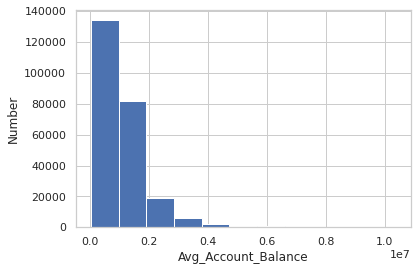

In [78]:
interval = 1000000
value_for_bin = np.ceil((train_data.Avg_Account_Balance.max() - train_data.Avg_Account_Balance.min()) / interval).astype(int)

plt.hist(train_data.Avg_Account_Balance, bins = value_for_bin)
plt.xlabel("Avg_Account_Balance")
plt.ylabel("Number")
plt.show()

In [ ]:
train_data.Vintage.max()

3

In [96]:
bins = [0, 1000000, 2000000, 3000000, 20000000]
labels = [0,1,2,3]
train_data['Avg_Account_Balance'] = pd.cut(train_data['Avg_Account_Balance'], bins=bins, labels=labels)
train_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,3,1,3,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0
2,0,2,2,3,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [97]:
testDataset=testDataset.fillna(method = 'ffill')
test_data = testDataset.copy()
test_data.drop('Region_Code', axis=1, inplace = True)
test_data.drop('ID', axis=1, inplace=True)

In [98]:
leTest = LabelEncoder()
test_data['Gender'] = leTest.fit_transform(test_data['Gender'])
test_data['Credit_Product'] = leTest.fit_transform(test_data['Credit_Product'])
test_data['Is_Active'] = leTest.fit_transform(test_data['Is_Active'])
change = {'Other':1,'Self_Employed':2,'Entrepreneur':3,'Salaried':0}
test_data.Occupation = test_data.Occupation.map(change)
change = {'X1':1,'X2':2,'X3':3,'X4':0}
test_data.Channel_Code = test_data.Channel_Code.map(change)
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,1,25,1,742366,0
1,1,43,1,2,49,1,925537,0
2,1,31,0,1,14,0,215949,0
3,1,29,1,1,33,0,868070,0
4,0,29,1,1,19,0,657087,0


In [99]:
bins = [0, 40, 65, 110, 150]
labels = [0,1,2,3]
test_data['Vintage'] = pd.cut(test_data['Vintage'], bins=bins, labels=labels)
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,1,0,1,742366,0
1,1,43,1,2,1,1,925537,0
2,1,31,0,1,0,0,215949,0
3,1,29,1,1,0,0,868070,0
4,0,29,1,1,0,0,657087,0


In [100]:
bins = [20, 38, 54, 70, 90]
labels = [0,1,2,3]
test_data['Age'] = pd.cut(test_data['Age'], bins=bins, labels=labels)
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,0,1,1,0,1,742366,0
1,1,1,1,2,1,1,925537,0
2,1,0,0,1,0,0,215949,0
3,1,0,1,1,0,0,868070,0
4,0,0,1,1,0,0,657087,0


In [101]:
bins = [0, 1000000, 2000000, 3000000, 20000000]
labels = [0,1,2,3]
test_data['Avg_Account_Balance'] = pd.cut(test_data['Avg_Account_Balance'], bins=bins, labels=labels)
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,0,1,1,0,1,0,0
1,1,1,1,2,1,1,0,0
2,1,0,0,1,0,0,0,0
3,1,0,1,1,0,0,0,0
4,0,0,1,1,0,0,0,0


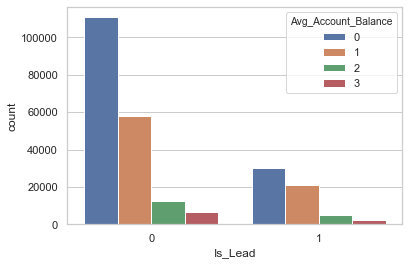

In [55]:
from sklearn.model_selection import train_test_split
X = train_data.iloc[:,:-1].values
y = train_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("shape of X_train",X_train.shape)
print("Shape of Y_train",y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (196580, 8)
Shape of Y_train (196580,)
Shape of x_test (49145, 8)


In [56]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [57]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_52 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_53 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_54 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_56 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_57 (Dense)             (None, 8)                

In [60]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.SGD(), metrics = ['acc'])
model.fit(X_train, y_train, batch_size = 36, verbose = 2, epochs = 100)

Epoch 1/100
5461/5461 - 7s - loss: 0.4974 - acc: 0.7645
Epoch 2/100
5461/5461 - 6s - loss: 0.4729 - acc: 0.7697
Epoch 3/100
5461/5461 - 6s - loss: 0.4682 - acc: 0.7734
Epoch 4/100
5461/5461 - 6s - loss: 0.4627 - acc: 0.7787
Epoch 5/100
5461/5461 - 6s - loss: 0.4567 - acc: 0.7835
Epoch 6/100
5461/5461 - 6s - loss: 0.4519 - acc: 0.7861
Epoch 7/100
5461/5461 - 6s - loss: 0.4494 - acc: 0.7881
Epoch 8/100
5461/5461 - 6s - loss: 0.4475 - acc: 0.7879
Epoch 9/100
5461/5461 - 6s - loss: 0.4462 - acc: 0.7885
Epoch 10/100
5461/5461 - 6s - loss: 0.4451 - acc: 0.7896
Epoch 11/100
5461/5461 - 6s - loss: 0.4442 - acc: 0.7899
Epoch 12/100
5461/5461 - 6s - loss: 0.4436 - acc: 0.7902
Epoch 13/100
5461/5461 - 6s - loss: 0.4433 - acc: 0.7900
Epoch 14/100
5461/5461 - 6s - loss: 0.4427 - acc: 0.7897
Epoch 15/100
5461/5461 - 6s - loss: 0.4425 - acc: 0.7906
Epoch 16/100
5461/5461 - 6s - loss: 0.4421 - acc: 0.7914
Epoch 17/100
5461/5461 - 6s - loss: 0.4418 - acc: 0.7911
Epoch 18/100
5461/5461 - 6s - loss: 0.44

In [62]:
predict = model.predict(X_test)
predict = (predict > 0.5).astype(int).ravel()
count=0
for i in range (len(predict)):
  if(predict[i] != y_test[i] ):
    count = count+1
print("total data :", len(y_test), "Unequal Data :", count)

total data : 49145 Unequal Data : 10246


In [64]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_train, Y_pred_rand)*100,2))

Precision :  59.84
Accuracy :  79.22
Recall :  37.79
F1 score :  46.33
AUC :  64.95


In [102]:
test_data['Is_Lead'] = (model.predict(test_data) > 0.5).astype(int).ravel()
test_data['ID'] = testDataset['ID']
submission = test_data[['ID','Is_Lead']]
submission.to_csv("submission.csv", index=False)
submission.tail()

,ID,Is_Lead
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0
105311,F2NOYPPZ,0
